# Image Classification Using TensoFlow GPU

In [667]:
import tensorflow as tf
import os

In [668]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Remove doggy images
Clean the images to eliminate corrupted files, unknown extensions and so on

In [669]:
import cv2
import imghdr

In [670]:
data_dir = "D:\Open Classroom\Datasets\Image Classification Datasets\Cars"

In [671]:
img_ext = ['jpeg', 'png', 'jpg', 'bmp']

In [672]:
os.listdir(data_dir)

['damaged', 'good cars']

In [673]:
os.listdir(os.path.join(data_dir, 'damaged'))

['1000_F_577039872_Bmf2OI7PCFy2BJq67ncSSQXfPP3i94eF.jpg',
 '114-1148053_car-accident-png-file-crashed-car-png.png',
 '1531822-blog103-640w.jpg',
 '2016-01-16961266868_35b9844c38_b.jpg',
 '20161017-2016LexusES350-300x225.jpg',
 '2022-04-04-15-28-58.jpg',
 '203035801_1734396213434272_8762682748023845733_n.jpg',
 '304084150.jpg',
 '34774682-automobile-crash-accident-on-street-damaged-cars-after-collision-in-city.jpg',
 '34774684-automobile-crash-accident-on-street-damaged-cars-after-collision-in-city.jpg',
 '360_F_551706575_iS5A8aCK56UtHfSl9icRvNddgscLFpud.jpg',
 '360_F_666551732_Vk1rTt04zDwt3LZf9GIGIJzLn9hU9yZb.jpg',
 '5-58188_damaged-car-hood-car-hood-damage-hd-png.png',
 '635986623665924683-hail1.JPG.jpg',
 '64c7de23beabd17b8d849a0a_Types_of_Car_Damage_Every_Driver_Needs_To_Know.jpg',
 '65035fd390988a3797c70c64cef5063b.jpg',
 '66176e4cbd7cd949ea60d012770c5cb7f29bcf89-1921x1081.jpg',
 '9b479f71f29f18a81cc2d8760a20b118.png',
 'A180wht-1.jpg',
 'accident-car-260nw-682388278.jpg',
 'accide

In [674]:
classes = os.listdir("D:\Open Classroom\Datasets\Image Classification Datasets\Cars")
classes

['damaged', 'good cars']

In [675]:
for image_class in os.listdir("D:\Open Classroom\Datasets\Image Classification Datasets\Cars"):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        # print(image_path)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(img_path)
            if tip not in img_ext:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\1000_F_577039872_Bmf2OI7PCFy2BJq67ncSSQXfPP3i94eF.jpg
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\114-1148053_car-accident-png-file-crashed-car-png.png
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\1531822-blog103-640w.jpg
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\2016-01-16961266868_35b9844c38_b.jpg
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\20161017-2016LexusES350-300x225.jpg
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\2022-04-04-15-28-58.jpg
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\203035801_1734396213434272_8762682748023845733_n.jpg
Issue with image D:\Open Classroom\Datasets\Image Classification Datasets\Cars\damaged\304084150.jpg
Issue w

### Load Dataset

In [676]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [677]:
import numpy as np
import matplotlib.pyplot as plt

In [678]:
keras_data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 319 files belonging to 2 classes.


In [679]:
data_iterator = keras_data.as_numpy_iterator()

In [680]:
batch = data_iterator.next() # Images represented in numpy array

In [681]:
batch

(array([[[[252.       , 252.       , 252.       ],
          [252.       , 252.       , 252.       ],
          [252.       , 252.       , 252.       ],
          ...,
          [227.       , 219.       , 208.       ],
          [224.33398  , 216.33398  , 205.33398  ],
          [220.14844  , 212.14844  , 201.14844  ]],
 
         [[252.       , 252.       , 252.       ],
          [252.       , 252.       , 252.       ],
          [252.       , 252.       , 252.       ],
          ...,
          [211.99144  , 203.99144  , 192.99144  ],
          [211.10817  , 203.10817  , 192.10817  ],
          [206.98633  , 198.98633  , 187.98633  ]],
 
         [[252.       , 252.       , 252.       ],
          [252.       , 252.       , 252.       ],
          [252.       , 252.       , 252.       ],
          ...,
          [205.22812  , 197.22812  , 186.22812  ],
          [206.10352  , 198.10352  , 187.10352  ],
          [202.30576  , 194.30576  , 183.30576  ]],
 
         ...,
 
         [[2

In [682]:
len(batch) # dislays a pipeline with images and labels

2

In [683]:
batch[0].shape

(32, 256, 256, 3)

In [684]:
# For context
# class 0 = shows damaged vehicles / cars
# class 1 = shows vehicles / cars in good condition
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

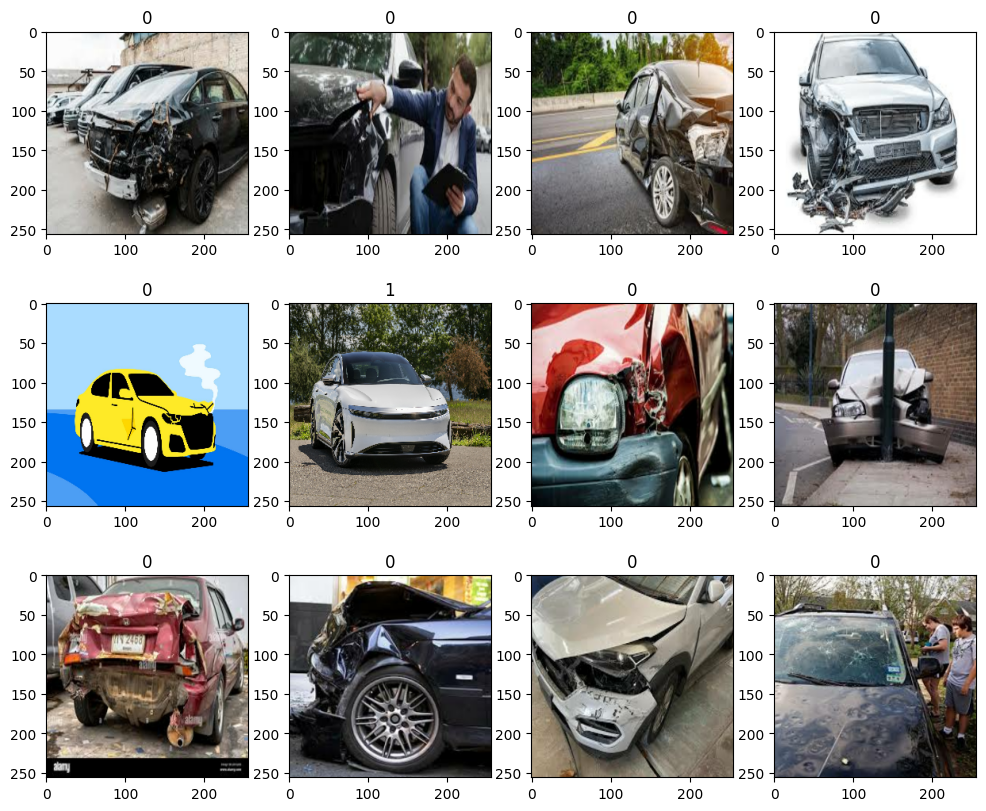

In [685]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
ax = ax.flatten()
for idx, image in enumerate(batch[0][:12]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])
                   

## Data Preprocessing

In [686]:
# The data should have a max value of 1 and min value of 0
keras_data = keras_data.map(lambda x, y: (x/255, y))

In [687]:
scaled_iterator = keras_data.as_numpy_iterator()

In [688]:
batch = scaled_iterator.next()

In [689]:
batch[1]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [690]:
batch[1].max()

1

In [691]:
batch[1].min()

0

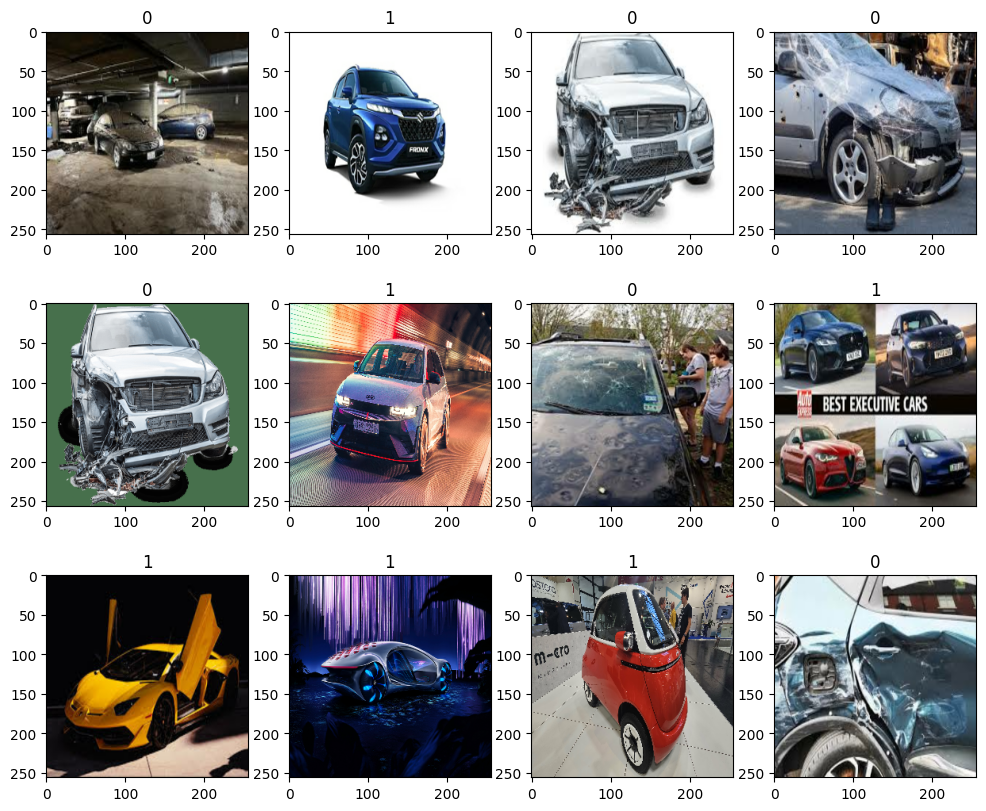

In [692]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
ax = ax.flatten()
for idx, image in enumerate(batch[0][:12]):
    ax[idx].imshow(image)
    ax[idx].title.set_text(batch[1][idx])
                   

## Split Dataset into Training and Test sets

In [693]:
len(batch)

2

In [694]:
train_size = int(len(keras_data)*.7)
val_size = int(len(keras_data)*.2)
test_size = int(len(keras_data)*.1)
# Note: make sure the keras data is already shuffled. 

In [695]:
# use the take and skip argument methods to assign the sizes of the batch respectively
train = keras_data.take(train_size)
val = keras_data.skip(train_size).take(val_size)
test = keras_data.skip(train_size + val_size).take(test_size)

In [696]:
print('train: ', len(train))
print('val: ', len(val))
print('test: ', len(test))

train:  7
val:  2
test:  1


## Deep Learning Model

In [728]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

In [729]:
model = Sequential()

In [730]:
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [731]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 125, 125, 32)        │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,693,465 (14.09 MB)

 Trainable params: 3,693,465 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [732]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

## Train the Model

In [702]:
logs_dir = "D:\Open Classroom\Datasets\Image Classification Datasets\logs"

In [703]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)

In [704]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.5088 - loss: 1.1663 - val_accuracy: 0.6719 - val_loss: 0.6747
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6057 - loss: 0.6811 - val_accuracy: 0.5469 - val_loss: 0.6766
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6112 - loss: 0.6618 - val_accuracy: 0.5625 - val_loss: 0.6530
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7266 - loss: 0.5830 - val_accuracy: 0.7969 - val_loss: 0.4733
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7298 - loss: 0.5596 - val_accuracy: 0.8594 - val_loss: 0.4195
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7956 - loss: 0.4908 - val_accuracy: 0.8594 - val_loss: 0.3755
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8847 - loss: 0.3811 - val_accuracy: 0.8906 - val_loss: 0.3230
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9168 - loss: 0.2695 - val_accuracy: 0.9531 - val_loss: 0.1912
Epoch 9/

In [705]:
import tensorflow as tf
import os

def is_image_file(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not is_image_file(file_path):
                print(f"Unsupported image file format: {file_path}")
            else:
                try:
                    image = tf.io.read_file(file_path)
                    tf.image.decode_image(image, channels=3)
                except tf.errors.InvalidArgumentError:
                    print(f"Invalid image format for file: {file_path}")

# Path to the directory containing images
directory_path = r"D:\Open Classroom\Datasets\Image Classification Datasets\Cars\good cars"

# Check images in the directory
check_images_in_directory(directory_path)


In [706]:
history.history

{'accuracy': [0.4508928656578064,
  0.6116071343421936,
  0.6294642686843872,
  0.75,
  0.7321428656578064,
  0.7678571343421936,
  0.8660714030265808,
  0.9285714030265808,
  0.9419642686843872,
  0.9419642686843872,
  0.9330357313156128,
  0.9419642686843872,
  0.96875,
  0.9821428656578064,
  0.9866071343421936,
  0.9910714030265808,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.0695887804031372,
  0.6799249053001404,
  0.6430807709693909,
  0.5651289224624634,
  0.5506474375724792,
  0.4985150992870331,
  0.3967147469520569,
  0.2621740400791168,
  0.20209093391895294,
  0.1813686192035675,
  0.17072537541389465,
  0.16900868713855743,
  0.10202186554670334,
  0.06106408312916756,
  0.04870516061782837,
  0.0424921028316021,
  0.017960520461201668,
  0.01310314517468214,
  0.009218563325703144,
  0.0042518191039562225],
 'val_accuracy': [0.671875,
  0.546875,
  0.5625,
  0.796875,
  0.859375,
  0.859375,
  0.890625,
  0.953125,
  1.0,
  1.0,
  0.875,
  0.953125,
  1.0,
  0.984375,
  0.9

### Plot the Performance

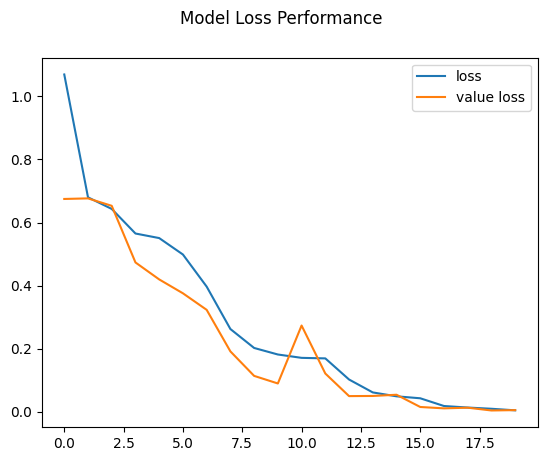

In [707]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='value loss')
plt.suptitle('Model Loss Performance')
plt.legend(loc='upper right')
plt.show()

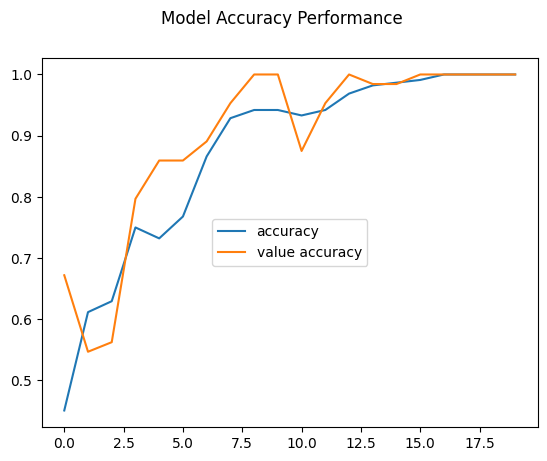

In [708]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='value accuracy')
plt.suptitle('Model Accuracy Performance')
plt.legend(loc='center')
plt.show()

## Evaluate Performance

In [709]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [710]:
prec = Precision()
rec = Recall()
bin_acc = BinaryAccuracy() 

In [711]:
for batch in test.as_numpy_iterator():
    x,y = batch
    y_pred = model.predict(x)
    prec.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    bin_acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


In [712]:
print(f'Precision: {prec.result().numpy()}, Recall: {rec.result()}, Binary Acc: {bin_acc.result()}')

Precision: 1.0, Recall: 1.0, Binary Acc: 1.0


## Manual Test

In [713]:
import cv2

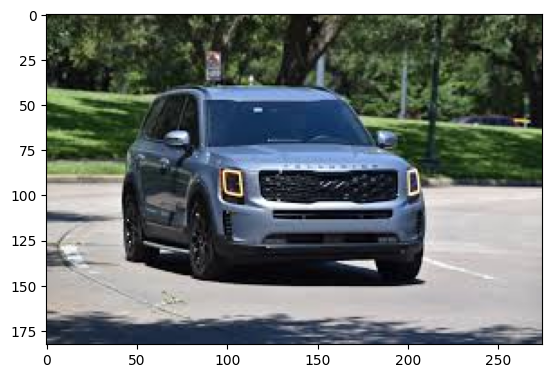

In [714]:
image = cv2.imread("D:\Downloads\good6.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

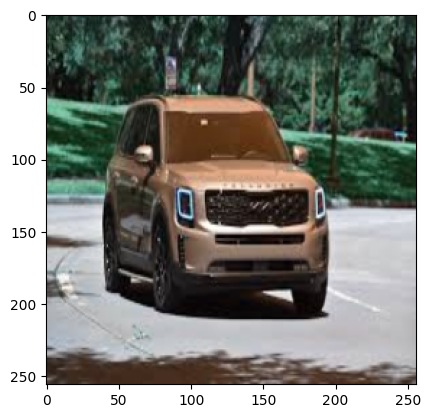

In [715]:
img_resize = tf.image.resize(image, (256, 256))
plt.imshow(img_resize.numpy().astype(int))

In [716]:
y_pred = model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [717]:
y_pred

array([[0.86964184]], dtype=float32)